In [1]:
%matplotlib inline

# ANN with 2F

This code:
- Classifies astrophysical sources into two groups using two features and a neural network.
- Uses stratified repeated k-fold cross-validation to ensure robust evaluation.
- Collects accuracy, true positive rate, and true negative rate.
- Predicts class probabilities for unknown (unlabeled) sources (unids).
- Writes out those probabilities for downstream analysis.

Then
1. Loads unID object features and neural network prediction results.
2. Reshapes and organizes prediction probabilities by object.
3. Computes mean and standard deviation of predicted probabilities across multiple models.
4. Prepares for threshold-based classification of unIDs (based on p_cut).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import sklearn
import seaborn as sns

In [3]:
XY_bal_log_Rel= np.genfromtxt('XY_bal_log_Rel.txt',dtype='str') 
XY_bal_log_Rel_data = np.asarray(XY_bal_log_Rel[1::,:],dtype=float)
print('Columns: ', XY_bal_log_Rel [0,:])

print('Shape of XY_bal_log_Rel_data: ', XY_bal_log_Rel_data.shape)


XY_bal_log_Rel_data_sigma0=np.zeros([0,XY_bal_log_Rel_data.shape[1]])

sigmaastro=0

for i in range (0,len(XY_bal_log_Rel_data)):
    if XY_bal_log_Rel_data[i,2]>=sigmaastro: #remeber column are 0=beta, 1=beta_err, 2=E_peak, 3=sigma, 4=curv_sign
        XY_bal_log_Rel_data_sigma0=np.concatenate( (XY_bal_log_Rel_data_sigma0, [XY_bal_log_Rel_data[i,:]] ) , axis=0)


XY_bal_log_Rel_data=XY_bal_log_Rel_data_sigma0

X_bal_log_Rel_data= XY_bal_log_Rel_data[:,[0,1]] # This selects only columns 0 and 1 (shape: (n, 2)), 
Y=XY_bal_log_Rel_data[:,4]
print('Shape of X_bal_log_Rel_data:', X_bal_log_Rel_data.shape)
print('Shape of Y: ', Y.shape)
print('10**XY_bal_log_Rel_data[:,2].min() ---- ', 10**XY_bal_log_Rel_data[:,2].min())
print('Y: ', Y)

Columns:  ['E_peak' 'beta' 'sigma' 'beta_Rel' '0,1=astro,DM']
Shape of XY_bal_log_Rel_data:  (5662, 5)
Shape of X_bal_log_Rel_data: (5662, 2)
Shape of Y:  (5662,)
10**XY_bal_log_Rel_data[:,2].min() ----  4.056
Y:  [0. 0. 0. ... 1. 1. 1.]


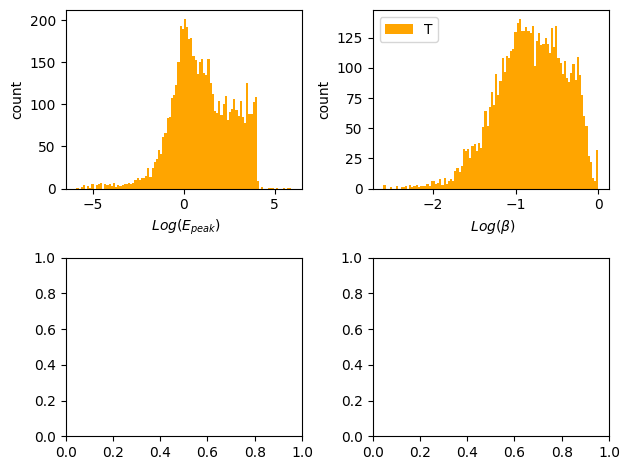

In [4]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

#colors = ['red', 'tan', 'lime']
ax0.hist(X_bal_log_Rel_data[:,[0]], 100, color='orange')
#ax0.hist(DM_log_bal_Rel[:,[0]], 100, color='m')
#ax0.hist(unids_log[:,[0]], 100, color='red')
#ax0.legend(prop={'size': 10})
#ax0.set_title('Epeak distribution')
ax0.set_xlabel(r' $Log(E_{peak})$')
ax0.set_ylabel('count')

ax1.hist(X_bal_log_Rel_data[:,[1]], 100, color='orange')
#ax1.hist(DM_log_bal_Rel[:,[1]], 100, color='m')
#ax1.hist(unids_log[:,[1]], 100,color='red')
ax1.legend(('TOT: Astro+DM'))
#ax1.set_title('Beta distribution')
ax1.set_xlabel(r' $Log(\beta)$')
ax1.set_ylabel('count')

"""
ax2.hist(X_bal_log_Rel_data[:,[2]], 100, color='orange')
#ax2.hist(DM_log_bal_Rel[:,[2]], 100, color='m')
#ax2.hist(unids_log[:,[2]], 100, color='red')
#ax2.set_title('sigma distribution')
ax2.set_xlabel(r' $Log(\sigma_{TS})$')
ax2.set_ylabel('count')
"""

"""
ax3.hist(X_bal_log_Rel_data[:,[3]], 100, color='orange')
#ax3.hist(DM_log_bal_Rel[:,[3]], 100, color='m')
#ax3.hist(unids_log[:,[3]], 100, color='red')
#ax3.set_title('beta_err distribution')
ax3.set_xlabel(r' $Log(\beta_{rel})$')
ax3.set_ylabel('count')
"""

fig.tight_layout()
plt.show()

#fig.savefig("histo_tot_data_bal.pdf", bbox_inches='tight')

In [5]:
"""
print('sigma max',10**X_bal_log_Rel_data[:,2].max())
print('sigma min',10**X_bal_log_Rel_data[:,2].min())
print('log sigma max',X_bal_log_Rel_data[:,2].max())
print('log sigma min',X_bal_log_Rel_data[:,2].min())
np.log10(100)
"""

"\nprint('sigma max',10**X_bal_log_Rel_data[:,2].max())\nprint('sigma min',10**X_bal_log_Rel_data[:,2].min())\nprint('log sigma max',X_bal_log_Rel_data[:,2].max())\nprint('log sigma min',X_bal_log_Rel_data[:,2].min())\nnp.log10(100)\n"

In [6]:
# Count the number of instances in each class of the binary label vector Y (0=astro, 1=DM)
NDM_sample=0

for i in range(0,len(Y)):
       if Y[i]==1: 
        NDM_sample=NDM_sample+1

print (NDM_sample)

Nastro_sample=0

for i in range(0,len(Y)):
       if Y[i]==0: 
        Nastro_sample=Nastro_sample+1
        
print (Nastro_sample)        

2831
2831


In [7]:

X_log=X_bal_log_Rel_data

#normalizer = sklearn.preprocessing.StandardScaler()
#normalizer.fit(X_log)
#print('StandardSaler mean', normalizer.mean_)
#X_log = normalizer.transform(X_log)

#X_log = np.log10(X_log)

print(X_log.shape)
print(X_log[1:5,0])
print(X_log[1:5,1])


print(Y.shape)

(5662, 2)
[0.70814035 0.22474019 0.25731851 0.32611046]
[-1.73752546e-04 -5.81201709e-01 -5.61932550e-01 -1.10017950e+00]
(5662,)


In [8]:
# Loading and Preprocessing New Data (unids)
unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 2)


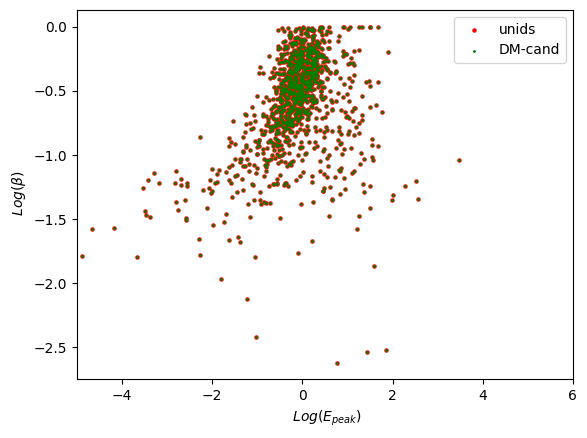

In [9]:
import matplotlib.pyplot as plt

f = plt.figure()
plt.scatter(unids_log[:,0],unids_log[:,1], color='red',label='unids',s=5)
plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
          color='green',label='DM-cand',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(\beta)$')
plt.xlabel(r' $Log(E_{peak})$')
plt.xlim(-5,6)

plt.legend()
plt.show()

# ANN

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [11]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

normalizer = sklearn.preprocessing.StandardScaler()

N_splits=5 #25% of testing set with N_splits=4, but we lost the easy 5 statitics in each bin
N_Repeats=2
#N_sample=N_splits*N_Repeats

OA=[]
TN=[]
TP=[]
#unIDs_std_proba_check_repeated_rs_stats_all=np.array((1,))

#OA_rs_stats=open("OA_rs_stats.txt", "w")
#OA_rs_stats.write('seed_value OA \n') 
#TN_rs_stats=open("TN_rs_stats.txt", "w")
#TN_rs_stats.write('seed_value TN \n') 
#TP_rs_stats=open("TP_rs_stats.txt", "w")
#TP_rs_stats.write('seed_value TP \n') 

unids_DM_std_proba_check_repeated_kfold_2F_21=open("unids_DM_std_proba_check_repeated_kfold_2F_21.txt", "w")
unids_DM_std_proba_check_repeated_kfold_2F_21.write('Numb unids_DM_proba_check_repeated_kfold \n') 


"""
------------------------------- Setting Up Cross-Validation -----------------------------------
Splits the data into stratified folds (preserving class ratio) for better generalization
Total 10 splits (5-fold repeated 2 times)
-----------------------------------------------------------------------------------------------
"""
rskf = RepeatedStratifiedKFold(n_splits=N_splits, n_repeats=N_Repeats)
rskf.get_n_splits(X_log, Y)
print('rskf',rskf)



"""
--------------------------------------- Classifier Setup --------------------------------------
A neural net with:
        - One hidden layer of 21 neurons.
        - ReLU activation.
        - Learning rate of 0.015.
        - 1000 max iterations.
        - Adam optimizer.
        - No L2 regularization (alpha=0.0).
-----------------------------------------------------------------------------------------------
"""
ANN = MLPClassifier(solver='adam', alpha=0.0, batch_size=120, hidden_layer_sizes=(21,), 
                 learning_rate_init=0.015, max_iter=1000, random_state=None, activation='relu')



""" 
--------------------------------- Training + Evaluation Loop ----------------------------------
For each cross-validation split:
1. Train-test split based on fold.
2. Standardize the features using StandardScaler (fit on training, transform both).
3. Train the MLP (ANN.fit()).
4. Predict:
        - Binary class predictions (predict()).
        - Class probabilities (predict_proba()).
5. Collect metrics:
        - Accuracy (OA).
        - Confusion matrix:
        - TN (True Negative Rate)
        - TP (True Positive Rate
"""    
for train_index, test_index in rskf.split(X_log, Y):
        print('train_index',train_index.shape, "test_index", test_index.shape)
        X_train_split, X_test_split = X_log[train_index], X_log[test_index]
        Y_train_split, Y_test_split = Y[train_index], Y[test_index]
        normalizer.fit(X_train_split)
        X_train_split_std=normalizer.transform(X_train_split)
        X_test_split_std=normalizer.transform(X_test_split)
    
        ANN_fit=ANN.fit(X_train_split_std, Y_train_split)
        Y_test_split_01_std_check=ANN_fit.predict(X_test_split_std)
        Y_test_split_proba_std_check=ANN_fit.predict_proba(X_test_split_std)
        
        OA.extend([accuracy_score(Y_test_split, Y_test_split_01_std_check)])
        conf_matrix=sklearn.metrics.confusion_matrix(Y_test_split, Y_test_split_01_std_check, normalize='true')
        TN.extend([conf_matrix[0,0]])
        TP.extend([conf_matrix[1,1]])
        
        
        "------------------------------------ Predict on Unidentified Sources --------------------------------------"
        unids_std_check=normalizer.transform(unids_log)
        unIDs_std_proba_check_repeated_kfold=ANN_fit.predict_proba(unids_std_check)
        """ 
        For each split, the model is also applied to the unids_log dataset (unlabeled sources),  nd it writes out the probability of being class 1 for each one.
        This provides multiple predictions across different models/splits.

        This writes a file: "unids_DM_std_proba_check_repeated_kfold_2F_21.txt" which contains, for each fold/repeat:
                - Column 0: the unID index (from 0 to N_unids-1)
                - Column 1: the predicted probability of being DM-like from that fold
        """
        for i in range(0,len(unids_std_check)):
                #unIDs_std_proba_check_repeated_rs_stats_all[i]=np.append(ANN_fit.predict_proba(unids_std_check)[i,1])
                unids_DM_std_proba_check_repeated_kfold_2F_21.write('{} {} \n'.format(i, 
                                                                    unIDs_std_proba_check_repeated_kfold[i,1]))
   

       # OA_rs_stats.write('{} {} \n'.format(seed_value[j], OA[j]))
        #TN_rs_stats.write('{} {} \n'.format(seed_value[j], TN[j]))
        #TP_rs_stats.write('{} {} \n'.format(seed_value[j], TP[j]))  

    
unids_DM_std_proba_check_repeated_kfold_2F_21.close()

#OA_rs_stats.close()
#TN_rs_stats.close()
#TP_rs_stats.close()


print('X_train_split.shape', X_train_split.shape)
print('X_test_split.shape', X_test_split.shape)

#unIDs_std_proba_check_repeated_rs_stats=np.array(unIDs_std_proba_check_repeated_rs_stats)
#print('unIDs_std_proba_check_repeated_rs_stats.shape',unIDs_std_proba_check_repeated_rs_stats.shape)
#print(unIDs_std_proba_check_repeated_rs_stats[0:3,:])

OA=np.array(OA)
#OA=np.reshape(OA,(len(unids_std_check),(N_sample)))
TN=np.array(TN)
#TN=np.reshape(TN,(len(unids_std_check),(N_sample)))
TP=np.array(TP)
#TP=np.reshape(TP,(len(unids_std_check),(N_sample)))



rskf RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None)
train_index (4529,) test_index (1133,)
train_index (4529,) test_index (1133,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4529,) test_index (1133,)
train_index (4529,) test_index (1133,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
X_train_split.shape (4530, 2)
X_test_split.shape (1132, 2)


In [12]:
print(OA.shape)
#print(OA)
print('OA mean', OA.mean(), 'OA std',OA.std(ddof=1))
print('TN mean', TN.mean(), 'TN std',TN.std(ddof=1))
print('TP mean', TP.mean(), 'TP std',TP.std(ddof=1))
print(unIDs_std_proba_check_repeated_kfold.shape)

(10,)
OA mean 0.8626823312198454 OA std 0.009437798143898205
TN mean 0.8760103701210886 TN std 0.02742877013674499
TP mean 0.8493384685375263 TP std 0.020384374454583982
(1125, 2)


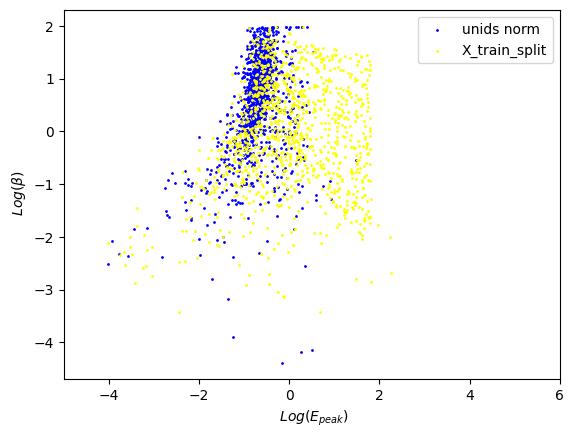

In [13]:
import matplotlib.pyplot as plt

f = plt.figure()
#plt.scatter(unids_log[:,0],unids_log[:,1], color='red',label='unids log',s=5)
#plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
         # color='green',label='unids lin data',s=1)
plt.scatter(unids_std_check[:,0],unids_std_check[:,1], 
          color='blue',label='unids norm',s=1)
plt.scatter(X_test_split_std[:,0],X_test_split_std[:,1], 
          color='yellow',label='X_train_split',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(\beta)$')
plt.xlabel(r' $Log(E_{peak})$')
plt.xlim(-5,6)

plt.legend()
plt.show()

In [14]:
from matplotlib.patches import Patch

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.5],
        xlim=[0, len(X_log)],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by RepeatedStratifiedKFold
  warnings.warn(
/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


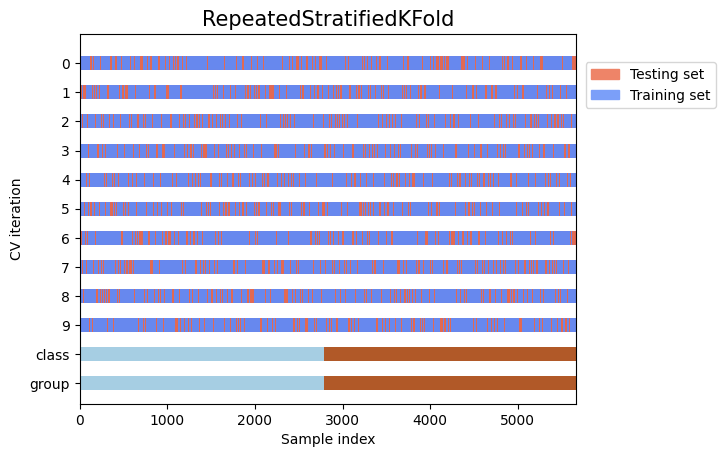

In [15]:
fig, ax = plt.subplots()
cv = rskf
plot_cv_indices(cv, X_log , Y, Y ,ax, N_splits*N_Repeats)
ax.axes
ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.2))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )

#fig.savefig("Reapeated5_Kfold5_split.pdf", bbox_inches='tight')

# unIDs classification with errors

Objective
To compute the mean and standard deviation of predicted probabilities (to be class 1 = DM-like) for each unID source, across multiple runs of the trained classifier (from the previous MLPClassifier code).

In [16]:

# Load unID source data
unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 2)


In [17]:
""" 
Load model prediction outputs
    - Loads the probabilities written during each fold of training.
    - Assumes format: [index, probability] for each unID, per split.
"""
unids_DM_std_proba_repeated_kfold= np.genfromtxt('unids_DM_std_proba_check_repeated_kfold_2F_21.txt',dtype='str') 
unids_DM_std_proba_data_repeated_kfold=np.asarray(unids_DM_std_proba_repeated_kfold[1::],dtype=float)
print(unids_DM_std_proba_data_repeated_kfold[0,:])
print(unids_DM_std_proba_data_repeated_kfold[1,:])

#N_splits=5
#N_Repeats=3

print('unids_DM_std_proba_data_repeated_kfold.shape',unids_DM_std_proba_data_repeated_kfold.shape)
print(unids_DM_std_proba_data_repeated_kfold[0,0:3])
print(unids_DM_std_proba_data_repeated_kfold[1,0:3])
print(unids_DM_std_proba_data_repeated_kfold[2,0:3])


[0.00000000e+00 5.37322349e-10]
[1.        0.4425122]
unids_DM_std_proba_data_repeated_kfold.shape (11250, 2)
[0.00000000e+00 5.37322349e-10]
[1.        0.4425122]
[2.         0.55500691]


In [18]:

#defining an array where each column is the probability to be DM for each unIDs in each split

#defining an array where each column is the probability to be DM for each unIDs in each split

""" 
Extract useful variables
      - N_unids: number of unID sources.
      - N_sample: number of times each unID was evaluated = number of folds × repeats.
"""
N_unids=unids_log.shape[0]
print('N_unids',N_unids)

#N_splits=3
#N_Repeats=10

N_sample=N_splits*N_Repeats
print('N_sample',N_sample)

print(unids_DM_std_proba_data_repeated_kfold.shape)

""" 
Reshape probability data. Purpose:
      Build a structured array where:
            - First column = unID index
            - Remaining columns = predicted probabilities across each of the N_sample splits
      This assumes the file ordering is consistent and that predictions are block-structured:
            - First N_unids rows = fold 1
            - Second N_unids rows = fold 2
            -  ...
"""
unids_number=unids_DM_std_proba_data_repeated_kfold[0:N_unids,0]

print('unids number',unids_number)
print('unids number shape',unids_number.shape)

unids_DM_std_proba_N_sample_repeated_kfold=np.zeros((N_unids,(N_sample+1)))

unids_DM_std_proba_N_sample_repeated_kfold[:,0]=unids_number[:].astype(int)
unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)]=np.reshape(
unids_DM_std_proba_data_repeated_kfold[:,1],(N_unids,(N_sample)))

print('unids_DM_std_proba_N_sample_repeated_kfold.shape', 
      unids_DM_std_proba_N_sample_repeated_kfold.shape)
print(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_DM_std_proba_N_sample_repeated_kfold=np.array(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_int_prob=float((unids_DM_std_proba_N_sample_repeated_kfold[:,1].T))
#print(unids_int_prob)

N_unids 1125
N_sample 10
(11250, 2)
unids number [0.000e+00 1.000e+00 2.000e+00 ... 1.122e+03 1.123e+03 1.124e+03]
unids number shape (1125,)
unids_DM_std_proba_N_sample_repeated_kfold.shape (1125, 11)
[[0.00000000e+00 5.37322349e-10 4.42512197e-01 ... 4.62310076e-10
  3.75779205e-01 5.30483565e-03]
 [1.00000000e+00 8.27407528e-27 4.67407990e-39 ... 5.97605793e-04
  9.81055514e-34 5.06849571e-01]
 [2.00000000e+00 3.27038056e-72 6.10033319e-15 ... 1.22976404e-04
  1.40370570e-06 4.41875012e-01]
 ...
 [1.12200000e+03 2.42773451e-01 4.70739912e-01 ... 5.47610505e-01
  8.53073252e-01 4.52988799e-01]
 [1.12300000e+03 2.85154045e-01 3.08379547e-01 ... 1.03460426e-13
  1.18413150e-15 3.30939359e-01]
 [1.12400000e+03 4.79617770e-01 7.24030053e-78 ... 7.35418613e-12
  1.12763849e-41 4.23005108e-01]]


In [19]:

""" 
Compute statistics
    - unids_mean: average probability of being DM-like across all splits
    - unids_std: standard deviation of that probability — gives a measure of confidence
"""
unids_mean=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].mean(axis=1)
unids_std=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].std(axis=1,ddof=1)
print('unids_mean', unids_mean, 'unids std',unids_std)
print(unids_mean.shape)

""" 
Define Probability Thresholds
    - mean_prob ≥ 0.90 (strong candidate)
    - mean_prob ≥ 0.50 (moderate candidate)
"""
p_cut=0.90
p_cut_50=0.50

unids_mean [0.20968863 0.15852111 0.26349874 ... 0.36752781 0.24965521 0.21157778] unids std [0.22702227 0.23080069 0.36164738 ... 0.30069413 0.23529955 0.22902564]
(1125,)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


In [21]:
# Configuration and data loading
# Configuration
N_splits = 5
N_Repeats = 2
N_sample = N_splits * N_Repeats

print(f"Cross-validation setup: {N_splits} splits × {N_Repeats} repeats = {N_sample} total folds")

# Load unID source data
unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt', dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::, :], dtype=float)
feature_names = unids_3F[0, :]

print(f"Feature names: {feature_names}")
print(f"UnID data shape: {unids_3F_data.shape}")

# Create log-transformed features (F_peak and beta)
unids_log = np.log10(unids_3F_data[:, [0, 1]])
print(f"Log-transformed features shape: {unids_log.shape}")

Cross-validation setup: 5 splits × 2 repeats = 10 total folds
Feature names: ['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
UnID data shape: (1125, 5)
Log-transformed features shape: (1125, 2)


In [22]:
# Load model prediction outputs
unids_DM_std_proba_repeated_kfold = np.genfromtxt('unids_DM_std_proba_check_repeated_kfold_2F_21.txt', dtype='str') 
unids_DM_std_proba_data_repeated_kfold = np.asarray(unids_DM_std_proba_repeated_kfold[1::], dtype=float)

print(f"Predictions data shape: {unids_DM_std_proba_data_repeated_kfold.shape}")
print(f"First few predictions:")
print(unids_DM_std_proba_data_repeated_kfold[:5, :])

# Get number of unidentified sources
N_unids = unids_log.shape[0]
print(f"Number of unidentified sources: {N_unids}")

Predictions data shape: (11250, 2)
First few predictions:
[[0.00000000e+00 5.37322349e-10]
 [1.00000000e+00 4.42512197e-01]
 [2.00000000e+00 5.55006908e-01]
 [3.00000000e+00 3.74826009e-01]
 [4.00000000e+00 3.43457173e-01]]
Number of unidentified sources: 1125


In [23]:
# Extract unID indices from first N_unids rows
unids_number = unids_DM_std_proba_data_repeated_kfold[0:N_unids, 0]
print(f"UnID indices shape: {unids_number.shape}")

# Create probability matrix: rows = unIDs, columns = CV folds + index
unids_DM_std_proba_N_sample_repeated_kfold = np.zeros((N_unids, N_sample + 1))

# Fill in the data
unids_DM_std_proba_N_sample_repeated_kfold[:, 0] = unids_number[:].astype(int)
unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample + 1)] = np.reshape(
    unids_DM_std_proba_data_repeated_kfold[:, 1], (N_unids, N_sample)
)

print(f"Probability matrix shape: {unids_DM_std_proba_N_sample_repeated_kfold.shape}")
print("First few rows of probability matrix:")
print(unids_DM_std_proba_N_sample_repeated_kfold[:5, :])

UnID indices shape: (1125,)
Probability matrix shape: (1125, 11)
First few rows of probability matrix:
[[0.00000000e+00 5.37322349e-10 4.42512197e-01 5.55006908e-01
  3.74826009e-01 3.43457173e-01 3.74290419e-14 4.06399411e-13
  4.62310076e-10 3.75779205e-01 5.30483565e-03]
 [1.00000000e+00 8.27407528e-27 4.67407990e-39 4.41493476e-01
  1.14023788e-61 5.20350525e-01 8.45432661e-02 3.13766373e-02
  5.97605793e-04 9.81055514e-34 5.06849571e-01]
 [2.00000000e+00 3.27038056e-72 6.10033319e-15 4.38009787e-01
  4.18900077e-02 7.69312322e-01 9.43775924e-01 6.40247869e-59
  1.22976404e-04 1.40370570e-06 4.41875012e-01]
 [3.00000000e+00 6.14911874e-01 2.98784244e-25 3.88715213e-01
  6.87010586e-01 4.70459797e-01 5.01566150e-01 6.23578263e-01
  4.64986885e-19 3.37702685e-01 9.38539046e-25]
 [4.00000000e+00 5.87156912e-01 4.56221804e-01 4.09309009e-01
  3.67379214e-37 1.23753623e-09 8.52721399e-01 2.35501997e-01
  2.91654921e-01 1.97352799e-16 3.55824954e-01]]


In [24]:
# Extract probability data (excluding index column)
prob_data = unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample + 1)]

# Compute comprehensive statistics
unids_mean = prob_data.mean(axis=1)
unids_std = prob_data.std(axis=1, ddof=1)
unids_median = np.median(prob_data, axis=1)
unids_q25 = np.percentile(prob_data, 25, axis=1)
unids_q75 = np.percentile(prob_data, 75, axis=1)
unids_min = prob_data.min(axis=1)
unids_max = prob_data.max(axis=1)

print("Statistics computed successfully!")
print(f"Mean probability: {unids_mean.mean():.4f} ± {unids_mean.std():.4f}")
print(f"Mean uncertainty: {unids_std.mean():.4f} ± {unids_std.std():.4f}")
print(f"Median probability: {np.median(unids_mean):.4f}")


Statistics computed successfully!
Mean probability: 0.2761 ± 0.0732
Mean uncertainty: 0.2350 ± 0.0494
Median probability: 0.2726


In [25]:
# Define thresholds
p_cut_high = 0.90      # High confidence threshold
p_cut_moderate = 0.50  # Moderate confidence threshold
uncertainty_threshold = 0.1  # Low uncertainty threshold

# High confidence candidates
high_conf_mask = unids_mean >= p_cut_high
high_conf_indices = np.where(high_conf_mask)[0]

# Moderate confidence candidates
moderate_conf_mask = (unids_mean >= p_cut_moderate) & (unids_mean < p_cut_high)
moderate_conf_indices = np.where(moderate_conf_mask)[0]

# Low uncertainty candidates (consistent predictions)
low_uncertainty_mask = unids_std <= uncertainty_threshold
low_uncertainty_indices = np.where(low_uncertainty_mask)[0]

# Very high confidence (95% threshold)
very_high_conf_mask = unids_mean >= 0.95
very_high_conf_indices = np.where(very_high_conf_mask)[0]

print(f"HIGH CONFIDENCE candidates (≥{p_cut_high:.0%}): {len(high_conf_indices)}")
print(f"VERY HIGH CONFIDENCE candidates (≥95%): {len(very_high_conf_indices)}")
print(f"MODERATE CONFIDENCE candidates ({p_cut_moderate:.0%}-{p_cut_high:.0%}): {len(moderate_conf_indices)}")
print(f"LOW UNCERTAINTY candidates (std ≤{uncertainty_threshold}): {len(low_uncertainty_indices)}")

if len(high_conf_indices) > 0:
    print(f"\nTop high confidence candidates:")
    for i in high_conf_indices[:5]:
        print(f"  Source {i}: p={unids_mean[i]:.4f} ± {unids_std[i]:.4f}")

HIGH CONFIDENCE candidates (≥90%): 0
VERY HIGH CONFIDENCE candidates (≥95%): 0
MODERATE CONFIDENCE candidates (50%-90%): 1
LOW UNCERTAINTY candidates (std ≤0.1): 8


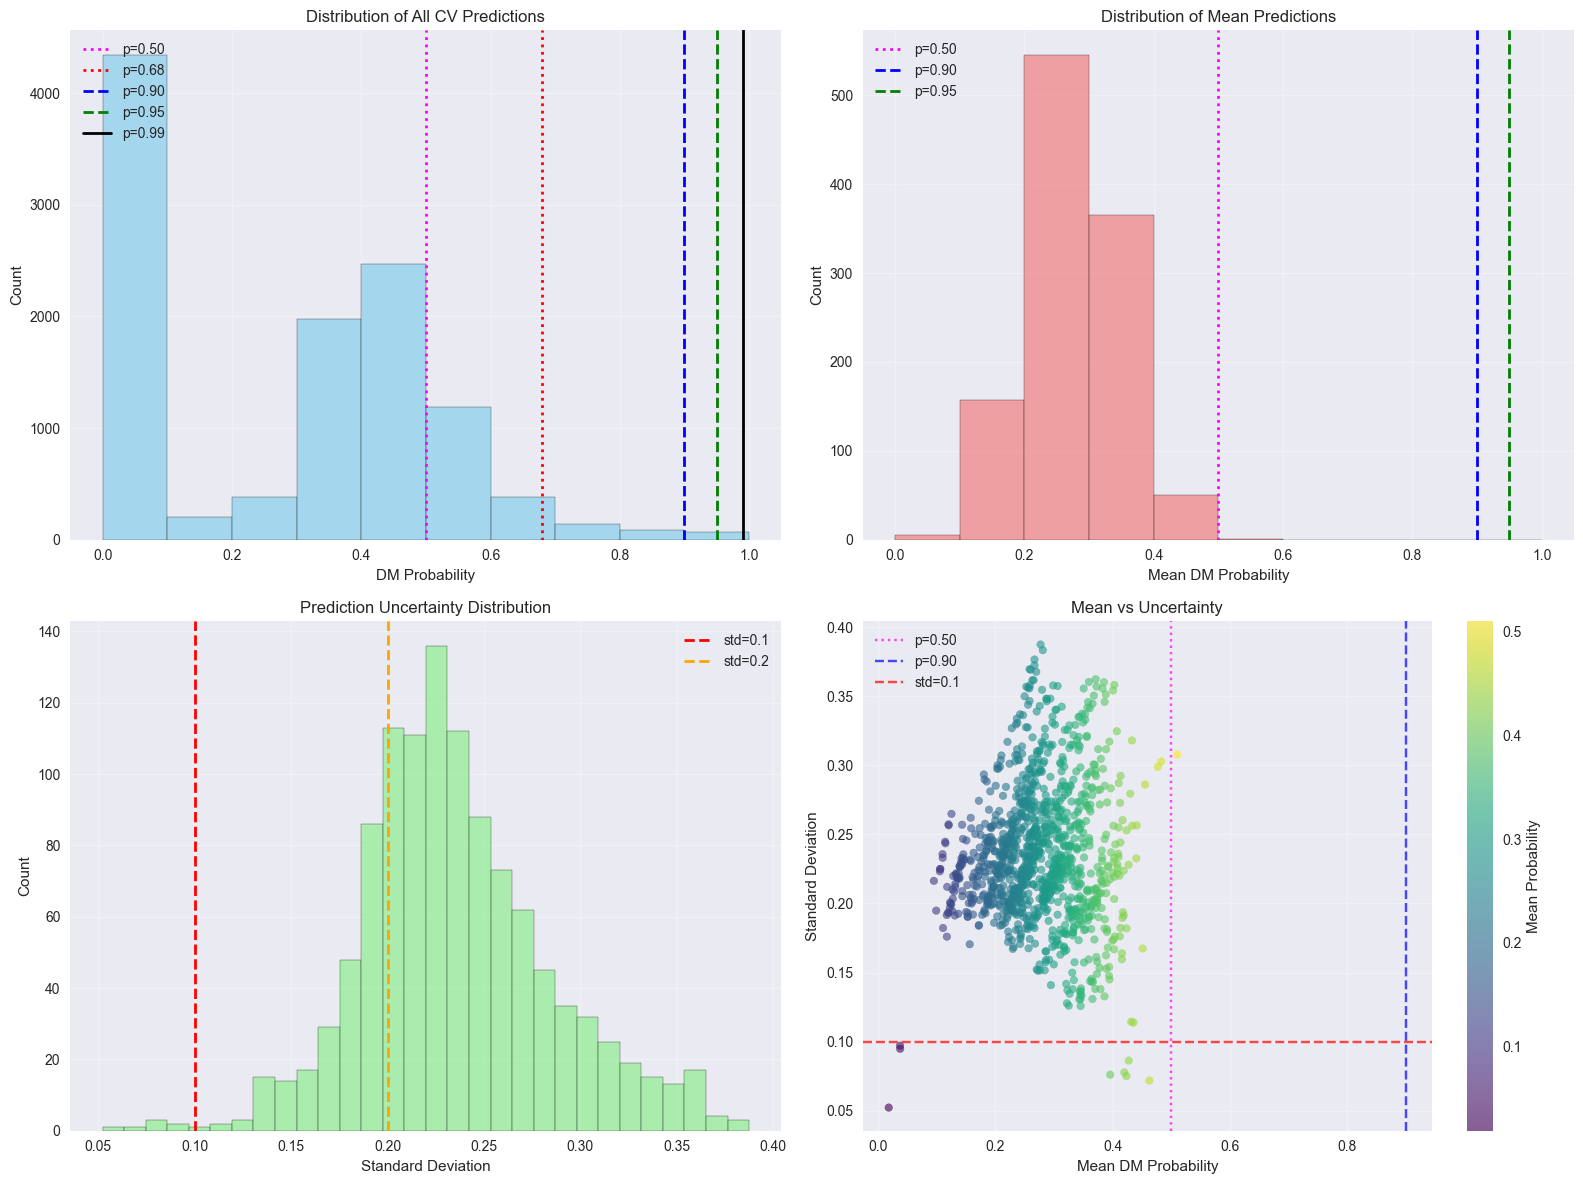

In [26]:
# Create comprehensive probability distribution plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. All predictions histogram (original style)
ax1 = axes[0, 0]
bins = np.arange(0.0, 1.1, 0.1)
counts, bins_edges, _ = ax1.hist(prob_data.flatten(), bins=bins, 
                                alpha=0.7, color='skyblue', edgecolor='black')

ax1.axvline(0.50, color='magenta', linestyle=':', linewidth=2, label='p=0.50')
ax1.axvline(0.68, color='red', linestyle=':', linewidth=2, label='p=0.68')
ax1.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax1.axvline(0.95, color='green', linestyle='--', linewidth=2, label='p=0.95')
ax1.axvline(0.99, color='black', linestyle='-', linewidth=2, label='p=0.99')

ax1.set_xlabel('DM Probability')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of All CV Predictions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Mean probability distribution
ax2 = axes[0, 1]
ax2.hist(unids_mean, bins=bins, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.axvline(0.50, color='magenta', linestyle=':', linewidth=2, label='p=0.50')
ax2.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax2.axvline(0.95, color='green', linestyle='--', linewidth=2, label='p=0.95')
ax2.set_xlabel('Mean DM Probability')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Mean Predictions')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Uncertainty distribution
ax3 = axes[1, 0]
ax3.hist(unids_std, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.axvline(0.1, color='red', linestyle='--', linewidth=2, label='std=0.1')
ax3.axvline(0.2, color='orange', linestyle='--', linewidth=2, label='std=0.2')
ax3.set_xlabel('Standard Deviation')
ax3.set_ylabel('Count')
ax3.set_title('Prediction Uncertainty Distribution')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Mean vs Std scatter plot
ax4 = axes[1, 1]
scatter = ax4.scatter(unids_mean, unids_std, alpha=0.6, c=unids_mean, 
                     cmap='viridis', s=30)
plt.colorbar(scatter, ax=ax4, label='Mean Probability')
ax4.axvline(0.50, color='magenta', linestyle=':', alpha=0.7, label='p=0.50')
ax4.axvline(0.90, color='blue', linestyle='--', alpha=0.7, label='p=0.90')
ax4.axhline(0.1, color='red', linestyle='--', alpha=0.7, label='std=0.1')
ax4.set_xlabel('Mean DM Probability')
ax4.set_ylabel('Standard Deviation')
ax4.set_title('Mean vs Uncertainty')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

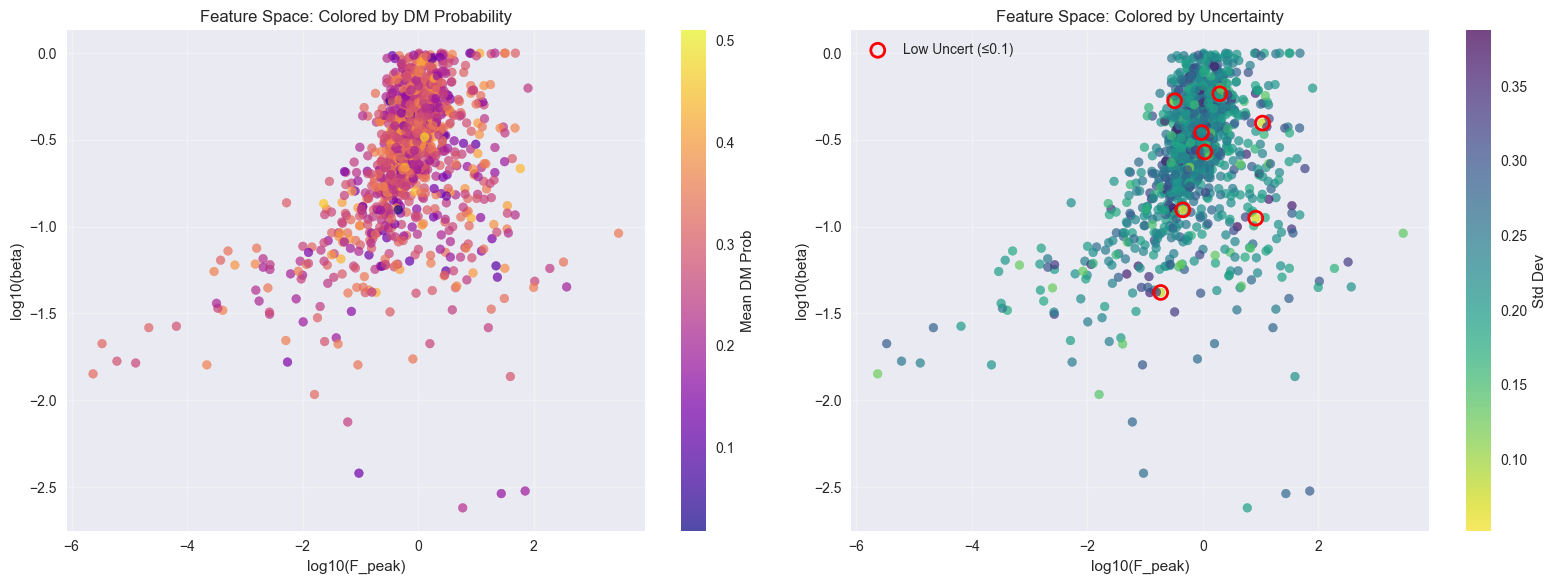

In [27]:
# Feature space analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Feature space colored by mean probability
ax1 = axes[0]
scatter = ax1.scatter(unids_log[:, 0], unids_log[:, 1], 
                     c=unids_mean, cmap='plasma', alpha=0.7, s=40)
plt.colorbar(scatter, ax=ax1, label='Mean DM Prob')
ax1.set_xlabel('log10(F_peak)')
ax1.set_ylabel('log10(beta)')
ax1.set_title('Feature Space: Colored by DM Probability')
ax1.grid(True, alpha=0.3)

# Highlight high confidence candidates
if len(high_conf_indices) > 0:
    ax1.scatter(unids_log[high_conf_indices, 0], unids_log[high_conf_indices, 1], 
               s=100, facecolors='none', edgecolors='red', linewidth=2, 
               label=f'High Conf (≥{p_cut_high:.0%})')
    ax1.legend()

# Feature space colored by uncertainty
ax2 = axes[1]
scatter2 = ax2.scatter(unids_log[:, 0], unids_log[:, 1], 
                      c=unids_std, cmap='viridis_r', alpha=0.7, s=40)
plt.colorbar(scatter2, ax=ax2, label='Std Dev')
ax2.set_xlabel('log10(F_peak)')
ax2.set_ylabel('log10(beta)')
ax2.set_title('Feature Space: Colored by Uncertainty')
ax2.grid(True, alpha=0.3)

# Highlight low uncertainty candidates
if len(low_uncertainty_indices) > 0:
    ax2.scatter(unids_log[low_uncertainty_indices, 0], unids_log[low_uncertainty_indices, 1], 
               s=100, facecolors='none', edgecolors='red', linewidth=2, 
               label=f'Low Uncert (≤{uncertainty_threshold})')
    ax2.legend()

plt.tight_layout()
plt.show()


In [28]:
# Top candidates analysis
# Create DataFrame for top candidates
top_20_indices = np.argsort(unids_mean)[-20:]  # Top 20 by mean probability
top_candidates_df = pd.DataFrame({
    'Source_ID': top_20_indices,
    'Mean_Prob': unids_mean[top_20_indices],
    'Std_Dev': unids_std[top_20_indices],
    'Median_Prob': unids_median[top_20_indices],
    'Min_Prob': unids_min[top_20_indices],
    'Max_Prob': unids_max[top_20_indices],
    'F_peak': unids_3F_data[top_20_indices, 0],
    'Beta': unids_3F_data[top_20_indices, 1],
    'log_F_peak': unids_log[top_20_indices, 0],
    'log_Beta': unids_log[top_20_indices, 1]
})

# Sort by mean probability (descending)
top_candidates_df = top_candidates_df.sort_values('Mean_Prob', ascending=False)
top_candidates_df = top_candidates_df.reset_index(drop=True)

print("TOP 20 DARK MATTER CANDIDATES:")
print("="*80)
display(top_candidates_df.round(4))


TOP 20 DARK MATTER CANDIDATES:


,Source_ID,Mean_Prob,Std_Dev,Median_Prob,Min_Prob,Max_Prob,F_peak,Beta,log_F_peak,log_Beta
0,776,0.5101,0.3078,0.5790,0.0000,0.9207,0.9548,0.3777,-0.0201,-0.4229
1,439,0.4829,0.3027,0.5130,0.0000,0.9339,3.5231,0.4710,0.5469,-0.3270
2,1114,0.4773,0.2990,0.4711,0.0000,0.9256,1.2945,0.3280,0.1121,-0.4841
3,771,0.4628,0.0718,0.4775,0.3685,0.5580,1.0848,0.2694,0.0353,-0.5696
4,785,0.4555,0.2861,0.5210,0.0000,0.8653,0.7870,0.2986,-0.1040,-0.5249
5,761,0.4514,0.1674,0.5089,0.0001,0.5594,0.0231,0.1360,-1.6357,-0.8665
6,777,0.4413,0.2565,0.5095,0.0000,0.7796,0.8864,0.1597,-0.0524,-0.7967
7,525,0.4406,0.2326,0.4374,0.0000,0.8716,2.6115,0.3131,0.4169,-0.5043
8,996,0.4358,0.1137,0.4665,0.1381,0.5696,0.5916,0.2197,-0.2280,-0.6582
9,734,0.4336,0.2563,0.4811,0.0004,0.9470,0.3387,0.3602,-0.4702,-0.4435


/var/folders/m8/9rd44wvx47j51lczw45sffl40000gn/T/ipykernel_32330/1737556152.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(valid_data, labels=valid_labels)


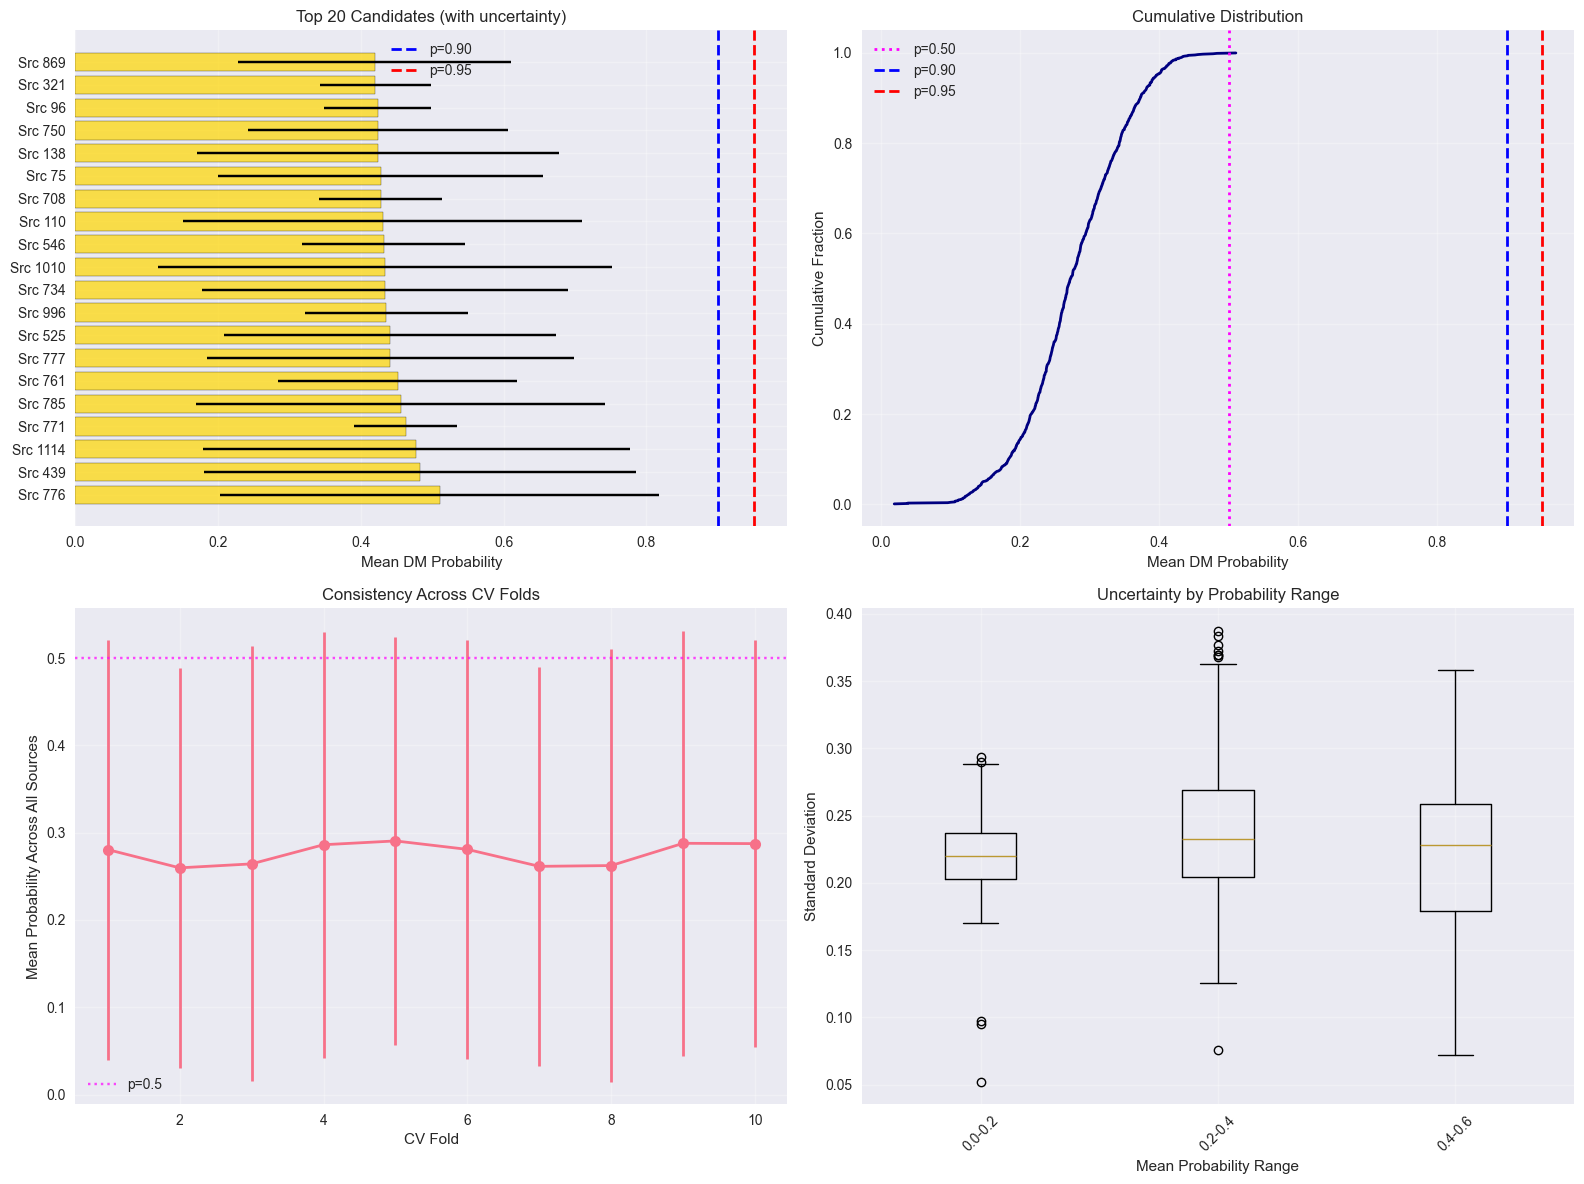

In [29]:
# Visualization of top candidates
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top candidates bar plot
ax1 = axes[0, 0]
y_pos = range(len(top_candidates_df))
bars = ax1.barh(y_pos, top_candidates_df['Mean_Prob'], 
               xerr=top_candidates_df['Std_Dev'], 
               alpha=0.7, color='gold', edgecolor='black')
ax1.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax1.axvline(0.95, color='red', linestyle='--', linewidth=2, label='p=0.95')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([f"Src {idx}" for idx in top_candidates_df['Source_ID']])
ax1.set_xlabel('Mean DM Probability')
ax1.set_title('Top 20 Candidates (with uncertainty)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Cumulative distribution
ax2 = axes[0, 1]
sorted_probs = np.sort(unids_mean)
cumulative = np.arange(1, len(sorted_probs) + 1) / len(sorted_probs)
ax2.plot(sorted_probs, cumulative, linewidth=2, color='navy')
ax2.axvline(0.50, color='magenta', linestyle=':', linewidth=2, label='p=0.50')
ax2.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax2.axvline(0.95, color='red', linestyle='--', linewidth=2, label='p=0.95')
ax2.set_xlabel('Mean DM Probability')
ax2.set_ylabel('Cumulative Fraction')
ax2.set_title('Cumulative Distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Cross-validation fold consistency
ax3 = axes[1, 0]
fold_means = np.mean(prob_data, axis=0)
fold_stds = np.std(prob_data, axis=0)
ax3.errorbar(range(1, N_sample + 1), fold_means, yerr=fold_stds, 
            marker='o', linewidth=2, markersize=8, capsize=5)
ax3.axhline(0.5, color='magenta', linestyle=':', alpha=0.7, label='p=0.5')
ax3.set_xlabel('CV Fold')
ax3.set_ylabel('Mean Probability Across All Sources')
ax3.set_title('Consistency Across CV Folds')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Box plot by probability ranges
ax4 = axes[1, 1]
prob_ranges = ['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
range_data = []
for i in range(5):
    low, high = i*0.2, (i+1)*0.2
    mask = (unids_mean >= low) & (unids_mean < high)
    if np.any(mask):
        range_data.append(unids_std[mask])
    else:
        range_data.append([])

valid_data = [data for data in range_data if len(data) > 0]
valid_labels = [prob_ranges[i] for i, data in enumerate(range_data) if len(data) > 0]

if valid_data:
    ax4.boxplot(valid_data, labels=valid_labels)
    ax4.set_xlabel('Mean Probability Range')
    ax4.set_ylabel('Standard Deviation')
    ax4.set_title('Uncertainty by Probability Range')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
# Create complete results DataFrame
results_df = pd.DataFrame({
    'Source_ID': range(N_unids),
    'Mean_Prob': unids_mean,
    'Std_Dev': unids_std,
    'Median_Prob': unids_median,
    'Q25_Prob': unids_q25,
    'Q75_Prob': unids_q75,
    'Min_Prob': unids_min,
    'Max_Prob': unids_max,
    'F_peak': unids_3F_data[:, 0],
    'Beta': unids_3F_data[:, 1],
    'log_F_peak': unids_log[:, 0],
    'log_Beta': unids_log[:, 1]
})

# Add candidate classification flags
results_df['Very_High_Conf'] = unids_mean >= 0.95
results_df['High_Conf'] = (unids_mean >= p_cut_high) & (unids_mean < 0.95)
results_df['Moderate_Conf'] = (unids_mean >= p_cut_moderate) & (unids_mean < p_cut_high)
results_df['Low_Uncertainty'] = unids_std <= uncertainty_threshold

# Sort by mean probability
results_df = results_df.sort_values('Mean_Prob', ascending=False).reset_index(drop=True)

# Save results
results_df.to_csv('unid_dm_analysis_complete_results.csv', index=False)
print(f"Complete results saved to 'unid_dm_analysis_complete_results.csv'")
print(f"Total sources analyzed: {len(results_df)}")

# Display summary by category
print("\nSUMMARY BY CANDIDATE CATEGORY:")
print("="*50)
categories = ['Very_High_Conf', 'High_Conf', 'Moderate_Conf', 'Low_Uncertainty']
for cat in categories:
    count = results_df[cat].sum()
    if count > 0:
        mean_prob = results_df[results_df[cat]]['Mean_Prob'].mean()
        mean_uncert = results_df[results_df[cat]]['Std_Dev'].mean()
        print(f"{cat.replace('_', ' ')}: {count} sources (avg prob: {mean_prob:.3f}, avg uncert: {mean_uncert:.3f})")


Complete results saved to 'unid_dm_analysis_complete_results.csv'
Total sources analyzed: 1125

SUMMARY BY CANDIDATE CATEGORY:
Moderate Conf: 1 sources (avg prob: 0.510, avg uncert: 0.308)
Low Uncertainty: 8 sources (avg prob: 0.278, avg uncert: 0.079)


In [31]:
# Generate text report
report_content = f"""
{'='*80}
DARK MATTER CANDIDATE ANALYSIS REPORT
{'='*80}

ANALYSIS PARAMETERS:
- Total unidentified sources: {N_unids}
- Cross-validation setup: {N_splits} splits × {N_Repeats} repeats = {N_sample} total folds
- High confidence threshold: {p_cut_high:.0%}
- Moderate confidence threshold: {p_cut_moderate:.0%}
- Low uncertainty threshold: {uncertainty_threshold}

OVERALL STATISTICS:
- Mean probability: {unids_mean.mean():.4f} ± {unids_mean.std():.4f}
- Median probability: {np.median(unids_mean):.4f}
- Mean uncertainty: {unids_std.mean():.4f} ± {unids_std.std():.4f}

CANDIDATE SUMMARY:
- Very High Confidence (≥95%): {len(very_high_conf_indices)} sources
- High Confidence (≥{p_cut_high:.0%}): {len(high_conf_indices)} sources
- Moderate Confidence ({p_cut_moderate:.0%}-{p_cut_high:.0%}): {len(moderate_conf_indices)} sources
- Low Uncertainty (≤{uncertainty_threshold}): {len(low_uncertainty_indices)} sources

TOP 10 CANDIDATES:
{'-'*50}
"""

for i in range(min(10, len(results_df))):
    row = results_df.iloc[i]
    report_content += f"Source {row['Source_ID']:3d}: p={row['Mean_Prob']:.4f}±{row['Std_Dev']:.4f} "
    report_content += f"(F_peak={row['F_peak']:.3e}, beta={row['Beta']:.4f})\n"

# Save report
with open('dm_candidates_report.txt', 'w') as f:
    f.write(report_content)

print("Analysis complete!")
print("Files generated:")
print("- unid_dm_analysis_complete_results_2F.csv")
print("- dm_candidates_report_2F.txt")

# Display final summary
print(f"\nFINAL SUMMARY:")
print(f"Analyzed {N_unids} unidentified sources")
print(f"Found {len(very_high_conf_indices)} very high confidence DM candidates (≥95%)")
print(f"Found {len(high_conf_indices)} high confidence DM candidates (≥{p_cut_high:.0%})")

Analysis complete!
Files generated:
- unid_dm_analysis_complete_results_2F.csv
- dm_candidates_report_2F.txt

FINAL SUMMARY:
Analyzed 1125 unidentified sources
Found 0 very high confidence DM candidates (≥95%)
Found 0 high confidence DM candidates (≥90%)


Text(0, 0.5, 'count')

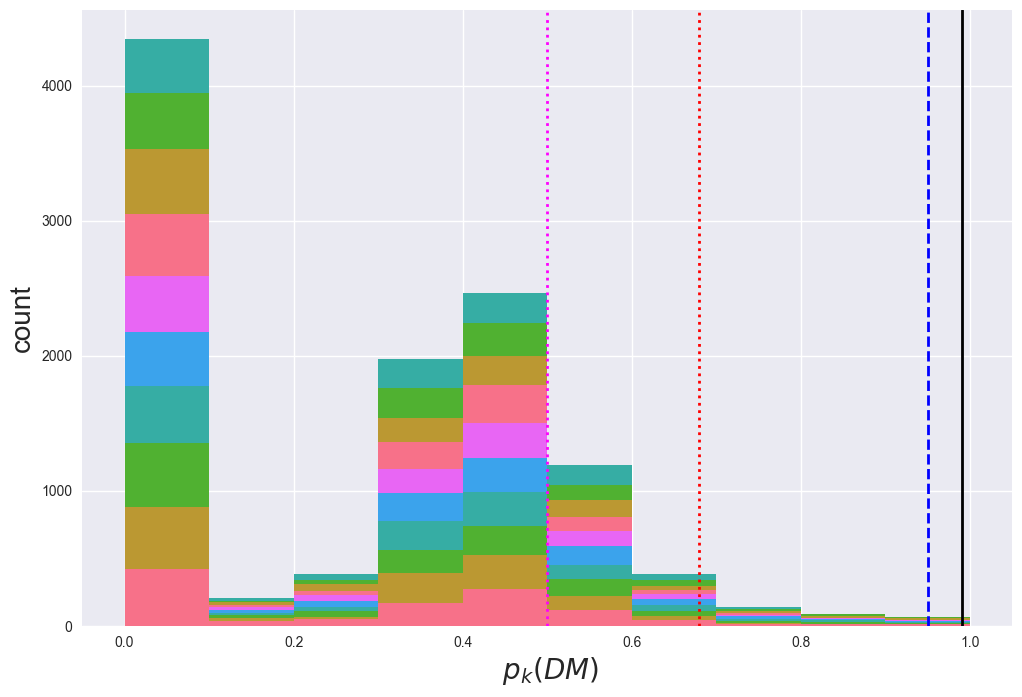

In [32]:
import matplotlib.pyplot as plt

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()
#for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold)):
counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], 
                                             bins, histtype='barstacked', density=False)
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=2)
plt.axvline(0.68, color='red', linestyle=':', linewidth=2)
plt.axvline(0.95, color='blue', linestyle='--', linewidth=2)
plt.axvline(0.99, color='black', linestyle='-', linewidth=2)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k(DM)$',size=20)
plt.ylabel('count',size=20)

#fig.savefig("full_histo_2F.pdf", bbox_inches='tight')


(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000')])

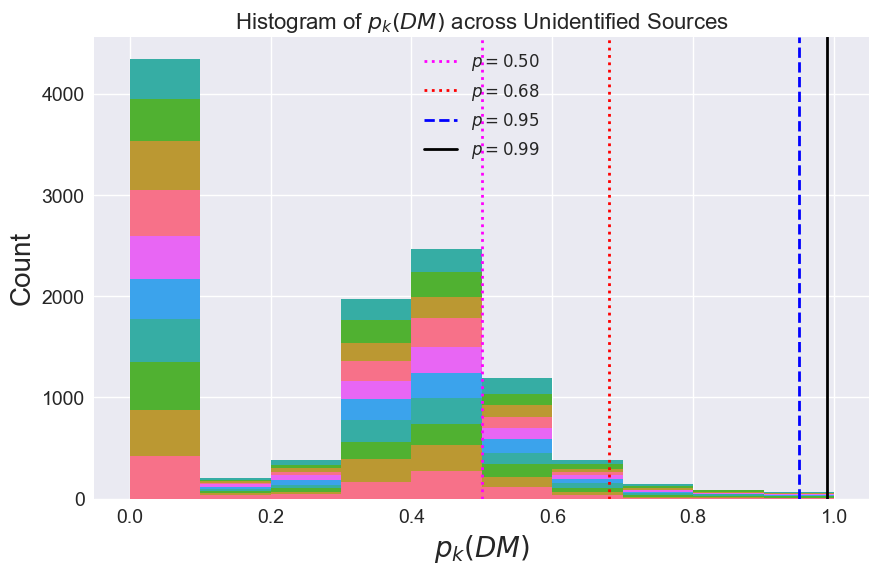

In [33]:
import matplotlib.pyplot as plt

# Histogram
bins = [i/10 for i in range(11)]
fig, ax = plt.subplots(figsize=(10, 6))
counts_all, bins_all, ignored = ax.hist(unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample+1)],
                                         bins=bins, histtype='barstacked', density=False)

# Threshold lines
ax.axvline(0.50, color='magenta', linestyle=':', linewidth=2)
ax.axvline(0.68, color='red', linestyle=':', linewidth=2)
ax.axvline(0.95, color='blue', linestyle='--', linewidth=2)
ax.axvline(0.99, color='black', linestyle='-', linewidth=2)

# Labels and title
ax.set_xlabel(r'$p_k(DM)$', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title("Histogram of $p_k(DM)$ across Unidentified Sources", fontsize=16)
ax.legend(["$p = 0.50$", "$p = 0.68$", "$p = 0.95$", "$p = 0.99$"], fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save figure
# fig.savefig(f"full_histo_2F_{datetime.now():%Y%m%d_%H%M%S}.pdf", bbox_inches='tight')


In [34]:
all_color=np.asarray(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)],dtype='str')

print(all_color.shape)

for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)])):
    for j in range(0,N_sample):
        all_color[i,j]='midnightblue'

print(len(unids_log))    
print(all_color.shape)
print(all_color)

(1125, 10)
1125
(1125, 10)
[['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ...
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']]


Text(0.31622776601683794, 1, ' $NN, 2F$')

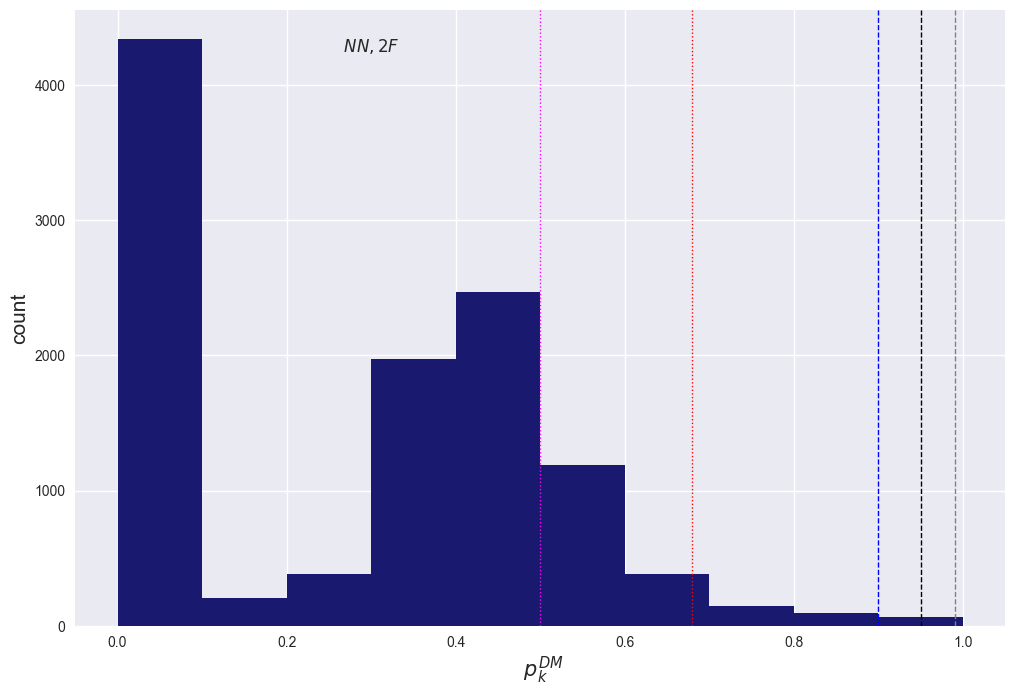

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], 
                                         bins,histtype='barstacked', density=False, color=all_color[i,:])
#plt.scatter(bins_all[:],counts_all[:])
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=1)
plt.axvline(0.68, color='red', linestyle=':', linewidth=1)
plt.axvline(0.90, color='blue', linestyle='--', linewidth=1)
plt.axvline(0.95, color='black', linestyle='--', linewidth=1)
plt.axvline(0.99, color='gray', linestyle='--', linewidth=1)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k^{DM}$',size=15)
plt.ylabel('count',size=15)
plt.title(r' $NN, 2F$', y=10**(0), x=10**(-0.5), pad=-30)
#plt.yscale('log')

#fig.savefig("full_histo_2F_single_count.pdf", bbox_inches='tight')

